In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt
from itertools import product
from combine.quick_g import widget_g_plot

import combine.grid_analyze_version2 as ga
import ipywidgets as widgets
import numpy as np
import pickle

In [2]:
with open("../grids/statistics_data.pickle", "rb") as file:
    d1 = pickle.load(file)

<IPython.core.display.Javascript object>


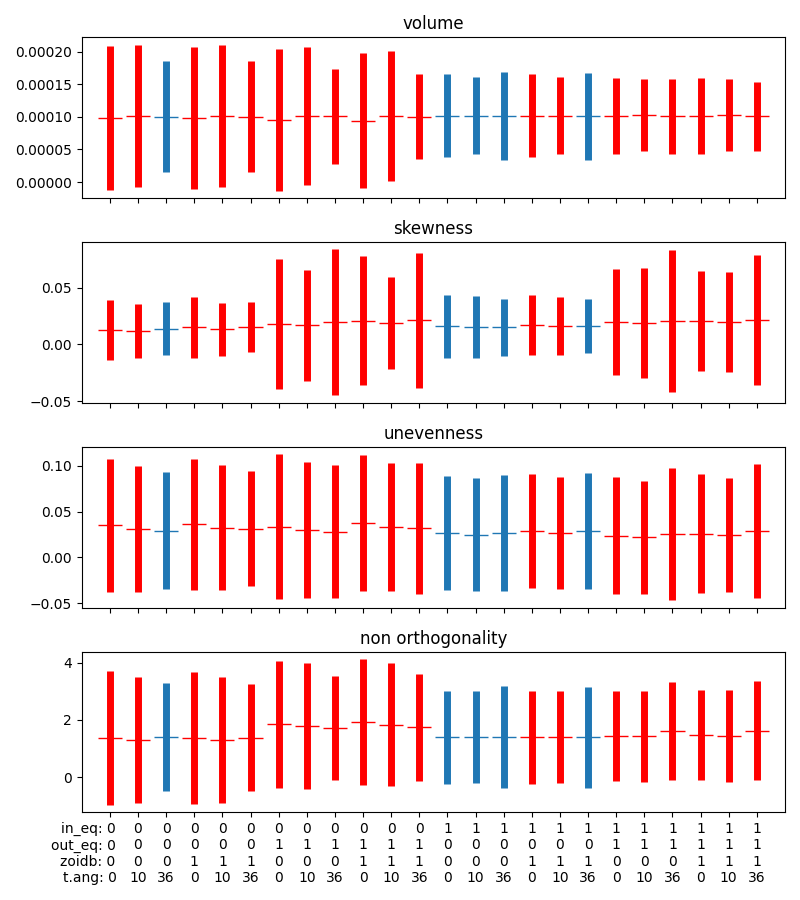

In [4]:
# Setup of plot
plt.close("all")
fig, axs = plt.subplots(nrows = 4, sharex = True, figsize=(8,9))
axs[0].set_title("volume")
axs[1].set_title("skewness")
axs[2].set_title("unevenness")
axs[3].set_title("non orthogonality")
axs[0].set_xticks([], [])
# ax.tick_params(axis='both', which='major', labelsize=7)

# Setup of x axis data
dk = list(d1.keys())
labels = [f"{i[0]}\n" +
          f"{i[1]}\n" +
          f"{i[2]}\n" + 
          f"{i[3]}" for i in dk]

labels[0] = f"""in_eq: {dk[0][0]}          
out_eq: {dk[0][1]}            
zoidb: {dk[0][2]}          
t.ang: {dk[0][3]}         """

label_vals = list(range(len(dk)))
axs[0].set_xticks(label_vals)
axs[0].set_xticklabels(labels)
axs[0].set_xlim(-1,len(labels))

# Setup of y axis data
qtys = ['volume', 'skewness', 'unevenness', 'nonorthogonality']  # convex

# plot everything
style = 0

cl = ["C0" if d1[i]["convex"] else "red" for i in list(d1.keys())]
for j, qty in enumerate(qtys):
    if style == 0:
        axs[j].vlines(label_vals, [d1[i][qty]["mean"] - d1[i][qty]["std"] for i in dk], 
                          [d1[i][qty]["mean"] + d1[i][qty]["std"] for i in dk], colors=cl, lw=5)
        axs[j].scatter(label_vals, [d1[i][qty]["mean"] for i in dk], marker="_", s=300, c=cl, lw=1)


    if style == 1:
        axs[j].vlines(label_vals, [d1[i][qty]["min"] for i in dk], [d1[i][qty]["max"] for i in dk], colors=cl, lw=1)
        axs[j].vlines(label_vals, [d1[i][qty]["mean"] - d1[i][qty]["std"] for i in dk], 
                          [d1[i][qty]["mean"] + d1[i][qty]["std"] for i in dk], colors=cl, lw=5)
        axs[j].scatter(label_vals, [d1[i][qty]["mean"] for i in dk], marker="_", s=300, c=cl, lw=1)
        
if style == 1:
    axs[0].set_ylim(bottom=-0.0005, top=0.001)
    axs[1].set_ylim(bottom=-0.1, top=1)
    axs[2].set_ylim(bottom=-0.1, top=0.5)
    axs[3].set_ylim(bottom=-1, top=20)
        
fig.tight_layout()
outstr = "grid_stats_no_minmax.png" if style == 0 else "grid_stats.png"
fig.savefig(outstr, dpi=200)    

In [10]:
d2[(0,0,0,0)]

{'unevenness_raw': array([0.23501328, 0.23487753, 0.23410418, ..., 0.01780852, 0.01775014,
        0.01762141]),
 'skewness_raw': array([1.47067598e-05, 1.08187811e-03, 1.96440440e-03, ...,
        1.58631337e-03, 1.57613624e-03, 2.94573562e-03]),
 'nonorthogonality_raw': array([0.01720562, 0.03019009, 0.07585743, ..., 0.16503491, 0.08074543,
        0.00695756]),
 'volume_raw': array([[[2.66262864e-05, 2.66408249e-05, 2.66941247e-05, ...,
          2.75993833e-05, 2.74497824e-05, 2.72999542e-05],
         [2.68805409e-05, 2.68751197e-05, 2.69088516e-05, ...,
          2.79320498e-05, 2.77830317e-05, 2.76324310e-05],
         [2.72517816e-05, 2.72257377e-05, 2.72391362e-05, ...,
          2.83711454e-05, 2.82224581e-05, 2.80707888e-05],
         ...,
         [2.72946432e-05, 2.73705161e-05, 2.74844246e-05, ...,
          2.80005223e-05, 2.78430194e-05, 2.76892426e-05],
         [2.69057100e-05, 2.69604311e-05, 2.70534762e-05, ...,
          2.77098612e-05, 2.75556572e-05, 2.74038572e-

In [5]:
with open("../grids/statistics_data_full.pickle", "rb") as file:
    d2 = pickle.load(file)
    
dk = list(d2.keys())
for i in dk: 
    d2[i]["skewness_raw"] = np.concatenate((d2[i]["skewness_raw"][0].flatten(),
                                            d2[i]["skewness_raw"][1].flatten()))
    d2[i]["unevenness_raw"] = np.concatenate((d2[i]["unevenness_raw"][0].flatten(),
                                              d2[i]["unevenness_raw"][1].flatten()))
    d2[i]["nonorthogonality_raw"] = np.concatenate((d2[i]["nonorthogonality_raw"][0].flatten(),
                                                    d2[i]["nonorthogonality_raw"][1].flatten()))

<IPython.core.display.Javascript object>


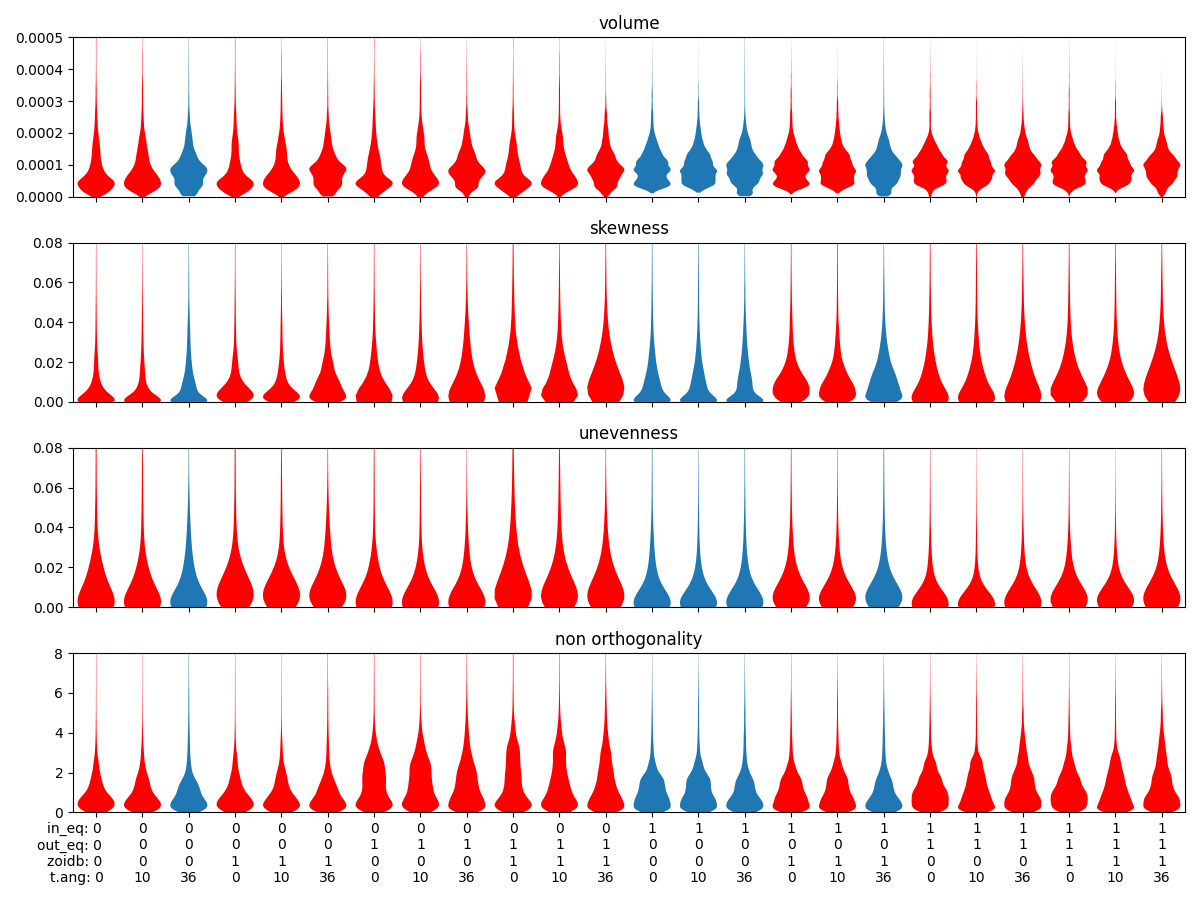

In [6]:
plt.close("all")
fig, axs = plt.subplots(nrows = 4, sharex = True, figsize=(12,9))
axs[0].set_title("volume")
axs[1].set_title("skewness")
axs[2].set_title("unevenness")
axs[3].set_title("non orthogonality")
axs[0].set_xticks([], [])
# ax.tick_params(axis='both', which='major', labelsize=7)

# Setup of x axis data
dk = list(d2.keys())
labels = [f"{i[0]}\n" +
          f"{i[1]}\n" +
          f"{i[2]}\n" + 
          f"{i[3]}" for i in dk]

labels[0] = f"""in_eq: {dk[0][0]}          
out_eq: {dk[0][1]}            
zoidb: {dk[0][2]}          
t.ang: {dk[0][3]}         """

label_vals = list(range(len(dk)))
axs[0].set_xticks(label_vals)
axs[0].set_xticklabels(labels)
axs[0].set_xlim(-0.5,len(labels)-0.5)

# Setup of y axis data
qtys = ['volume_raw', 'skewness_raw', 'unevenness_raw', 'nonorthogonality_raw']  # convex

# plot everything
cl = ["C0" if d2[i]["convex"] else "red" for i in list(d2.keys())]
for j, qty in enumerate(qtys):
    yes = [d2[i][qty].flatten() for i in dk]
    parts = axs[j].violinplot(yes, label_vals, widths=0.8, showextrema=False, points=500)
    for k, pc in enumerate(parts['bodies']):
        pc.set_facecolor(cl[k]);
        pc.set_alpha(1)
        
axs[0].set_ylim(bottom=-0, top=0.0005)
axs[1].set_ylim(bottom=-0, top=0.08)
axs[2].set_ylim(bottom=-0, top=0.08)
axs[3].set_ylim(bottom=-0, top=8)
    
fig.tight_layout()
fig.savefig("grid_violins.png", dpi=200)  
fig.savefig("grid_violins.svg")  

In [14]:
d2[dk[0]][qtys[0]]

array([[[2.66262864e-05, 2.66408249e-05, 2.66941247e-05, ...,
         2.75993833e-05, 2.74497824e-05, 2.72999542e-05],
        [2.68805409e-05, 2.68751197e-05, 2.69088516e-05, ...,
         2.79320498e-05, 2.77830317e-05, 2.76324310e-05],
        [2.72517816e-05, 2.72257377e-05, 2.72391362e-05, ...,
         2.83711454e-05, 2.82224581e-05, 2.80707888e-05],
        ...,
        [2.72946432e-05, 2.73705161e-05, 2.74844246e-05, ...,
         2.80005223e-05, 2.78430194e-05, 2.76892426e-05],
        [2.69057100e-05, 2.69604311e-05, 2.70534762e-05, ...,
         2.77098612e-05, 2.75556572e-05, 2.74038572e-05],
        [2.66348057e-05, 2.66691710e-05, 2.67420264e-05, ...,
         2.75265252e-05, 2.73752125e-05, 2.72249865e-05]],

       [[3.08899027e-05, 3.09050452e-05, 3.09472241e-05, ...,
         3.22066417e-05, 3.22354572e-05, 3.22305901e-05],
        [3.10594585e-05, 3.10615270e-05, 3.10897743e-05, ...,
         3.24301723e-05, 3.24601729e-05, 3.24547248e-05],
        [3.14008601e-05, 

In [ ]:
lg = np.load("grids/g_eqi1_eqo1_zp0_ta10.npy")
widget_g_plot(lg, phi=0, widget=True)